<a href="https://colab.research.google.com/github/Xin-overclocked/pns/blob/main/huisan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 1: Define Your Research Question and Dataset**


*   Clearly state your research question
*   Briefly describe your dataset, including its source, the main variables, sample size, and any limitations.

**Research Questions**


1.   How does the age of athletes influence their likelihood of winning a medal in the Olympics across various sports?
2.   To what extent does an athlete's weight impact their chances of securing a medal in the Olympics, considering different sports categories?

In [129]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/athlete_events.csv')

In [130]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [131]:
# Select only the 'Age', 'Weight', and 'Medal' columns
df = df[['Sport', 'Age', 'Weight', 'Medal']]

# Handle missing values
df.dropna(subset=['Sport', 'Age', 'Weight'], inplace=True)

<ipython-input-131-06b5c3aa518e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Sport', 'Age', 'Weight'], inplace=True)


**Source:**

The dataset is sourced from Kaggle and it contains information on Olympic athletes.  The specific file used is 'athlete_events.csv'.

**Main Variables:**

The dataset includes key variables such as athlete information (ID, name, sex, age, height, weight), game details (year, season, city), sport and event information, and medal outcomes (gold, silver, bronze).

**Limitations:**

* Missing Data:  The presence of missing values (NaNs) in columns like 'Age', 'Height', and 'Weight' may introduce bias or necessitate imputation.

* Data Accuracy:  Data accuracy from historical sources may vary.

* Representativeness: The dataset may not accurately represent all athletes who have ever participated in the Olympics throughout history.

* Scope: Limited to recorded data points in the dataset and may not cover all aspects of an athlete's performance or contextual factors.


In [103]:
print(f"Sample Size: {df.shape[0]}")

Sample Size: 30425


In [104]:
df

,Sport,Age,Weight,Medal
40,Ice Hockey,28.0,85.0,Bronze
41,Gymnastics,28.0,64.0,Bronze
42,Gymnastics,28.0,64.0,Gold
44,Gymnastics,28.0,64.0,Gold
48,Gymnastics,28.0,64.0,Gold
...,...,...,...,...
271078,Athletics,25.0,80.0,Silver
271080,Athletics,33.0,80.0,Bronze
271082,Fencing,28.0,82.0,Bronze
271102,Athletics,19.0,64.0,Bronze


from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Medal_Numeric'].plot(kind='hist', bins=20, title='Medal_Numeric')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Weight', y='Medal_Numeric', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Medal_Binary']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Medal_Binary']
  ys = series['Weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('Weight')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Medal_Binary']
  ys = series['Medal_Numeric']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('Medal_Numeric')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Medal_Binary']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Medal_Binary'}, axis=1)
              .sort_values('Medal_Binary', ascending=True))
  xs = counted['Medal_Binary']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Medal_Binary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Medal_Binary')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Weight'].plot(kind='line', figsize=(8, 4), title='Weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Medal_Numeric'].plot(kind='line', figsize=(8, 4), title='Medal_Numeric')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Section 2: Summarize Key Data with Descriptive Statistics**



* Present summary statistics (mean, median, variance, etc.) visually using bar charts, pie charts, or histograms.
* Highlight any interesting patterns or trends you observe in the data.



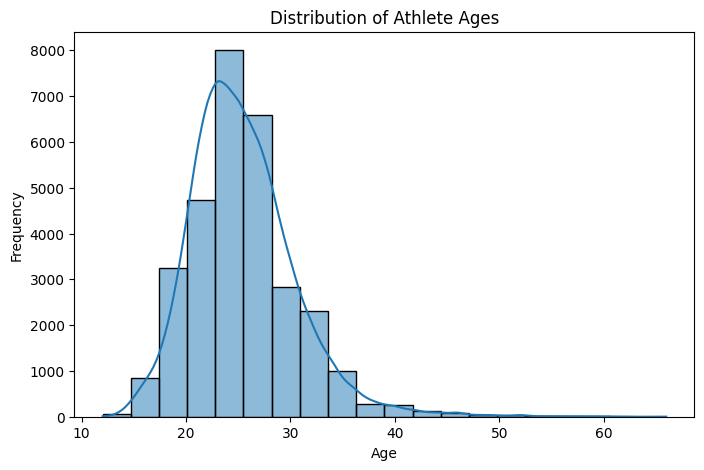

In [105]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Athlete Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

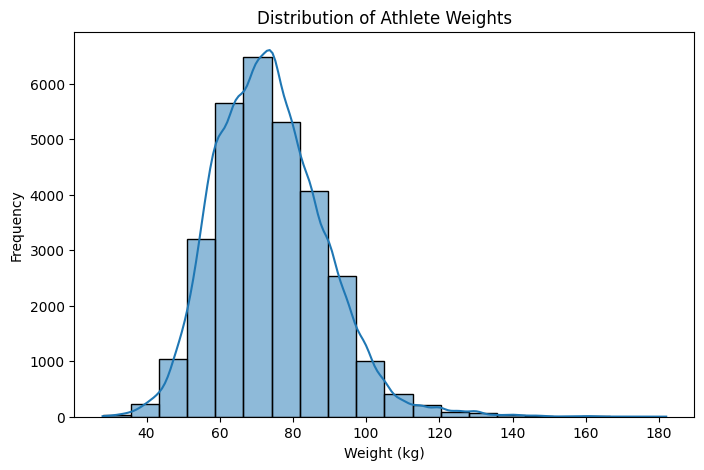

In [106]:
# 2. Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Weight'], bins=20, kde=True)
plt.title('Distribution of Athlete Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

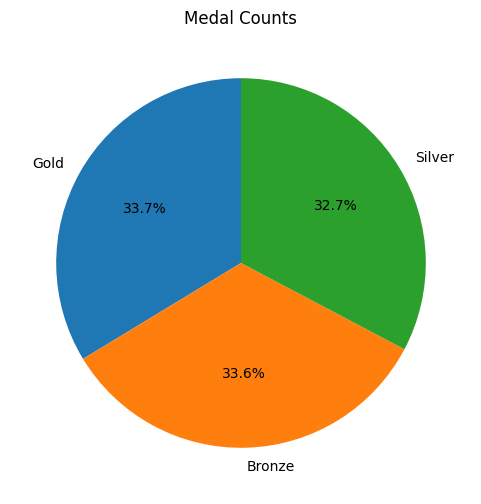

In [107]:
# 3. Medal Proportion
medal_counts = df['Medal'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Medal Counts')
plt.show()

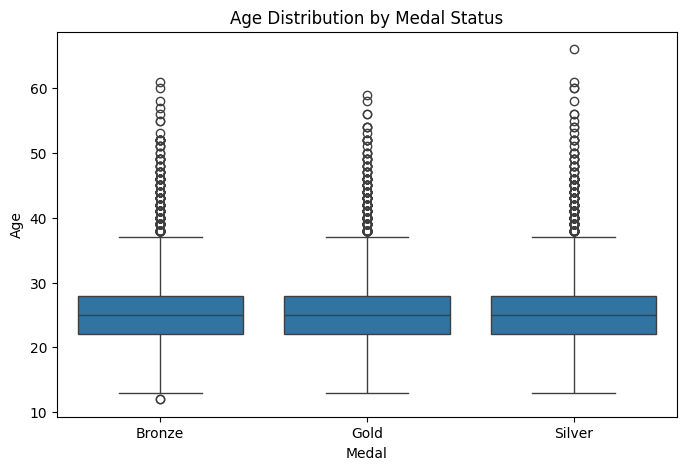

In [108]:
# 4. Age vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Age', data=df)
plt.title('Age Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Age')
plt.show()

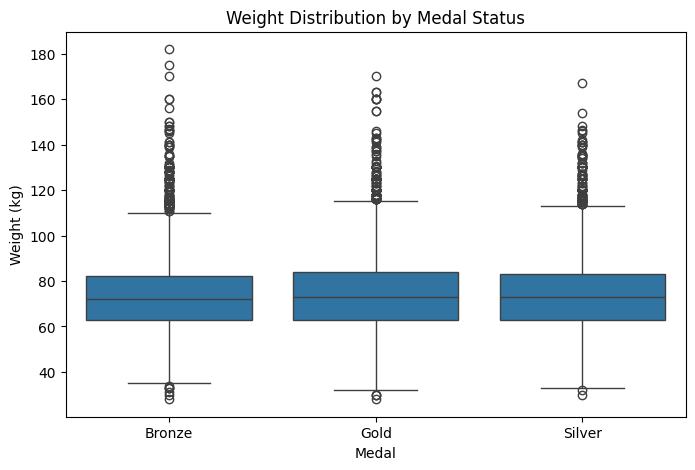

In [109]:
# 5. Weight vs. Medal (Box Plot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Medal', y='Weight', data=df)
plt.title('Weight Distribution by Medal Status')
plt.xlabel('Medal')
plt.ylabel('Weight (kg)')
plt.show()

# **Section 3: Conduct a Probability Analysis**





* Calculate and visualize the probability of a key outcome (e.g., probability of customer satisfaction above a certain threshold, or probability of achieving a top score).
* Explain the significance of these probabilities in relation to your research question



# **Section 4: Perform Hypothesis Testing**

* State and test a hypothesis related to your research question
* Show your results visually (e.g., p-values, confidence intervals) and briefly summarize your findings.

## RQ1:

How does the age of athletes influence their likelihood of winning a medal in the Olympics across various sports?

**Hypothesis**

Null Hypothesis (H0): There is no significant relationship between the age of athletes and their likelihood of winning a medal in the Olympics.

Alternative Hypothesis (H1): There is a significant relationship between the age of athletes and their likelihood of winning a medal in the Olympics.

In [138]:
# Create a copy so original DataFrame is preserved in case you make mistakes
working_df = df.copy()

# Now continue with your data processing steps using 'working_df' instead of 'df'
bins = [0, 18, 24, 30, 36, 42, 48, 100]
labels = ['<0', '18-24', '25-30', '31-36', '37-42', '43-48', '49+']
working_df['Age_Group'] = pd.cut(working_df['Age'], bins=bins, labels=labels, right=True)

# Convert Medal to a numeric representation
# Instead of pd.Categorical, use .map to assign numeric values to medal categories
df['Medal_Numeric'] = df['Medal'].map({'Gold': 1, 'Silver': 2, 'Bronze': 3, 'None':0}).astype(int)


# Fit a multinomial logistic regression model using the numeric Medal column
model = smf.mnlogit('Medal_Numeric ~ Age_Group', data=df)
result = model.fit()

# Print the summary of the regression
print(result.summary())

# Extract p-values and confidence intervals
p_values = result.pvalues
conf = result.conf_int()
conf['OR'] = result.params
conf.columns = ['2.5%', '97.5%', 'OR']

# Display p-values and confidence intervals
print("\nP-values:\n", p_values)
print("\nConfidence Intervals:\n", conf)

# Visualizing the results
# Create a count plot of medals by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age_Group', hue='Medal', palette='viridis')
plt.title('Distribution of Medals by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of Medals')
plt.legend(title='Medal Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing Odds Ratios with Confidence Intervals
plt.figure(figsize=(10, 6))
sns.barplot(x=conf.index, y='OR', data=conf, palette='viridis', capsize=.2)
plt.errorbar(x=conf.index, y=conf['OR'],
             yerr=[conf['OR'] - conf['2.5%'], conf['97.5%'] - conf['OR']],
             fmt='none', c='black', capsize=5)
plt.title('Odds Ratios of Winning a Medal by Age Group')
plt.ylabel('Odds Ratio (OR)')
plt.xticks(rotation=45)
plt.axhline(1, color='red', linestyle='--')  # Reference line at OR=1
plt.tight_layout()
plt.show()

AttributeError: 'float' object has no attribute 'copy'

## RQ2:
To what extent does an athlete's weight impact their chances of securing a medal in the Olympics, considering different sports categories?